# Homework 10

Thomas Atkins, Chris Dailey, Sam Kahn

## 10.0 

##### What is Apache Spark and how is it different to Apache Hadoop? 

Apache Spark is a framework specifically for computation, not storage.  It is based on the idea that operations done in memory are much faster than oeprations done from disk and leverages the idea of lazy computation to increase efficiency and speed.

##### Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, ...... languages (list languages). 

Scala, and Python.

##### Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or ????? in a distributed manner.

Hadoop

##### What is an RDD and show a fun example of creating one and bringing the first element back to the driver program.

An RDD is a resilient distributed dataset.  An RDD is a set of instructions of how to contruct from original data a modified set of data and the associated calculations performed on it.  An example in python would look like:

textfile = sc.textFile("example.txt").first()

##### What is lazy evaluation and give an intuitoive example of lazy evaluation and comment on the massive computational savings to be had from lazy evaluation.

Lazy evaluation allows for creating a directed acyclic graph of modifications to an original dataset without executing those modifications until needed.  This way, rather than compute one step at a time all steps are computed immediately one after the other included any final calculations.  This also means less wasted computation since the framework can optimize the graph based on its knowledge of its entirety.  Also, data that is eliminated by a step in the graph can be thrown away much earlier in the graph, again saving computation and increasing efficiency and speed.

## 10.1 

In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document as a the example document to run an experiment.  Report the following: provide a sorted list of tokens in decreasing order of frequency of occurence.


In [1]:
!head MIDS-MLS-HW-10.txt

===MIDS UC Berkeley, Machine Learning at Scale DATSCI W261 ASSIGNMENT #10===
-----------------------
V1.3 Final 03/15/2016  HW10
-----------------------
SPECIAL INSTURCTIONS
 This weeks homework is a group exercise. Your team assignments for completing this HW are located at:

https://docs.google.com/spreadsheets/d/1ncFQl5Tovn-16slD8mYjP_nzMTPSfiGeLLzW8v_sMjg/edit?usp=sharing


In [11]:
import os
os.environ['SPARK_HOME'] = "/home/ubuntu/spark-1.6.1-bin-hadoop2.6/"

In [12]:
import findspark

In [13]:
findspark.init()

In [14]:
from pyspark import SparkConf, SparkContext

In [15]:
conf = SparkConf().setMaster('local').setAppName("myApp")

In [16]:
sc = SparkContext(conf= conf)

In [11]:
lines = sc.textFile("MIDS-MLS-HW-10.txt")

In [12]:
print lines

MIDS-MLS-HW-10.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:-2


In [13]:
lines.count()

132

In [14]:
lines.flatMap(lambda x: x.split(' '))\
.map(lambda x: (x, 1))\
.reduceByKey(lambda x, y: x + y)\
.sortBy(lambda x: x[1], ascending=False)\
.collect()

[(u'', 108),
 (u'the', 46),
 (u'and', 23),
 (u'in', 18),
 (u'of', 17),
 (u'a', 12),
 (u'for', 11),
 (u'code', 9),
 (u'to', 9),
 (u'data', 8),
 (u'=', 8),
 (u'is', 8),
 (u'on', 7),
 (u'this', 7),
 (u'Using', 7),
 (u'#', 7),
 (u'your', 7),
 (u'with', 7),
 (u'===', 6),
 (u'KMeans', 6),
 (u'HW', 6),
 (u'from', 5),
 (u'as', 5),
 (u'example', 4),
 (u'What', 4),
 (u'each', 4),
 (u'linear', 4),
 (u'Set', 4),
 (u'clusters', 4),
 (u'Sum', 4),
 (u'Comment', 4),
 (u'==HW', 4),
 (u'Squared', 4),
 (u'results', 3),
 (u'+', 3),
 (u'100', 3),
 (u'plot', 3),
 (u'following', 3),
 (u'Spark', 3),
 (u'after', 3),
 (u'count', 3),
 (u'training', 3),
 (u'Please', 3),
 (u'words', 3),
 (u'import', 3),
 (u'report', 3),
 (u'===HW', 3),
 (u'x', 3),
 (u'available', 3),
 (u'lazy', 3),
 (u'it', 3),
 (u'regression', 3),
 (u'document', 3),
 (u'model', 3),
 (u'Errors', 3),
 (u'using', 3),
 (u'Within', 3),
 (u'provided', 3),
 (u'an', 3),
 (u'Apache', 2),
 (u'--', 2),
 (u'list', 2),
 (u'vector', 2),
 (u'plots.', 2),
 (u'LA

## 10.1.1
Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.


In [15]:
import re
lines.flatMap(lambda x: x.split(' '))\
.filter(lambda x: re.match('^[a-z]', x))\
.map(lambda x: (x, 1))\
.reduceByKey(lambda x, y: x + y)\
.sortBy(lambda x: x[1], ascending=False)\
.collect()

[(u'the', 46),
 (u'and', 23),
 (u'in', 18),
 (u'of', 17),
 (u'a', 12),
 (u'for', 11),
 (u'code', 9),
 (u'to', 9),
 (u'is', 8),
 (u'data', 8),
 (u'with', 7),
 (u'on', 7),
 (u'your', 7),
 (u'this', 7),
 (u'from', 5),
 (u'as', 5),
 (u'clusters', 4),
 (u'linear', 4),
 (u'each', 4),
 (u'example', 4),
 (u'results', 3),
 (u'words', 3),
 (u'using', 3),
 (u'available', 3),
 (u'lazy', 3),
 (u'training', 3),
 (u'count', 3),
 (u'import', 3),
 (u'plot', 3),
 (u'following', 3),
 (u'it', 3),
 (u'an', 3),
 (u'regression', 3),
 (u'report', 3),
 (u'document', 3),
 (u'after', 3),
 (u'x', 3),
 (u'model', 3),
 (u'provided', 3),
 (u'how', 2),
 (u'homework', 2),
 (u'findings.', 2),
 (u'one', 2),
 (u'notebook:', 2),
 (u'list', 2),
 (u'set', 2),
 (u'testing', 2),
 (u'decreasing', 2),
 (u'run', 2),
 (u'regression.', 2),
 (u'per', 2),
 (u'iterations,', 2),
 (u'between', 2),
 (u'evaluation', 2),
 (u'be', 2),
 (u'https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0', 2),
 (u'word', 2),
 (u'here', 2),
 (u

## HW 10.2: KMeans a la MLLib 

Using the following  MLlib-centric KMeans code snippet and list the clusters that your find and compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.


In [17]:
from numpy import array
from math import sqrt

In [19]:
#for some reason, the cell above must be run before this cell.
#it will fail if you load them in reverse order and they can't even be in the same cell.
from pyspark.mllib.clustering import KMeans, KMeansModel

In [20]:
# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt") 

In [21]:
 
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

In [22]:
# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

/home/ubuntu/spark-1.6.1-bin-hadoop2.6/python/pyspark/mllib/clustering.py:176: UserWarning: Support for runs is deprecated in 1.6.0. This param will have no effect in 1.7.0.
  "Support for runs is deprecated in 1.6.0. This param will have no effect in 1.7.0.")


In [23]:
# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

In [24]:
WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

Within Set Sum of Squared Error = 0.692820323028


In [25]:
# Save and load model
clusters.save(sc, "./model")
sameModel = KMeansModel.load(sc, "./model")

Mostly my findings consist of the fact that the default conda installation of pyspark is version 1.1.0 which does not include much of the current functionality of the library so I ended up using a different solution.  I also discovered that pyspark is remarkably fickle about the way you import dependencies.  I discovered that Spark is way more efficient, code- and effort-wise, than pure mapreduce, even with MRJob. Also, the WSSSE is about .7

## 10.3

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:

  -- plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
  
  -- in each plot please report the Within Set Sum of Squared Errors for the found clusters. Comment on the progress of this measure as the KMEans algorithms runs for more iterations

In [5]:
 %matplotlib inline

In [6]:
import numpy as np
import pylab 
import json

size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]

In [7]:
np.savetxt('data.csv',data,delimiter = ',')

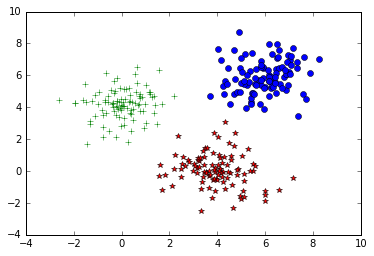

In [8]:
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

In [9]:
#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

#plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()
    

Iteration1
[[ 0.44218636  0.9657787 ]
 [ 4.1036576   2.67255473]
 [ 1.7882037   5.53430327]]


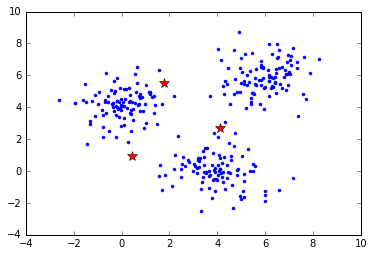

Within Set Sum of Squared Error = [(0, 96.03744031542296), (1, 477.54165231958086), (2, 277.2162351798751)]



Iteration10
[[ 3.93375275  0.053748  ]
 [ 5.96468685  5.92796806]
 [ 0.0147152   4.18931853]]


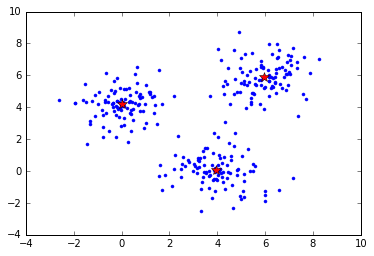

Within Set Sum of Squared Error = [(0, 124.91858580445556), (1, 122.23308058744006), (2, 108.42656454673144)]



Iteration20
[[ 3.93375275  0.053748  ]
 [ 5.96468685  5.92796806]
 [ 0.0147152   4.18931853]]


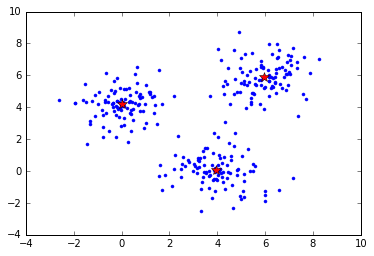

Within Set Sum of Squared Error = [(0, 124.91858580445556), (1, 122.23308058744006), (2, 108.42656454673144)]



Iteration100
[[ 3.93375275  0.053748  ]
 [ 5.96468685  5.92796806]
 [ 0.0147152   4.18931853]]


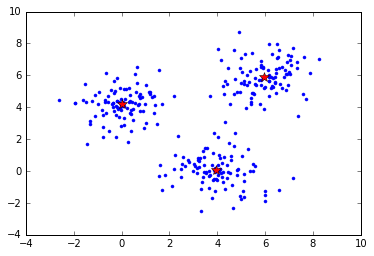

Within Set Sum of Squared Error = [(0, 124.91858580445556), (1, 122.23308058744006), (2, 108.42656454673144)]



Final Results:
[[ 3.93375275  0.053748  ]
 [ 5.96468685  5.92796806]
 [ 0.0147152   4.18931853]]


In [32]:
# Evaluate clustering by computing Within Set Sum of Squared Errors
def single_error(init_tuple):
    centroid_idx = init_tuple[0]
    point = init_tuple[1]
    return centroid_idx, sqrt(sum([x**2 for x in (point - centroids[centroid_idx])]))

def find_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return closest_centroid_idx, x

K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("./data.csv").cache()
iter_num = 0
for i in range(100):  
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    #res [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)  ), 
    #     (2, (array([ 6023.84995923,  5975.48511018]), 1000)), 
    #     (1, (array([ 3986.85984761,    15.93153464]), 999))]
    # res[1][1][1] returns 1000 here
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
#     if np.sum(np.absolute(centroids_new-centroids))<0.01:
#         break
    iter_num = iter_num + 1 
    centroids = centroids_new
    if iter_num in [1,10,20,100]:
        print "Iteration" + str(iter_num)
        print centroids
        plot_iteration(centroids)
        
        WSSSE = D.map(find_centroid).map(single_error).reduceByKey(lambda x, y: x + y).collect()
        print("Within Set Sum of Squared Error = " + str(WSSSE))
        print '\n\n'
        
        
print "Final Results:"
print centroids

The data was generated pretty spherically, so it makes sense that the errors about even out as the algorithm converges.  Also, using WSSSE as a convergence criteria seems equivalent to using centroid movement since one drives the other.  The only difference is this requires a second run-through of the data.

## 10.4
Using the KMeans code provided repeat the experiments in HW10.3. Comment on any differences between the results in HW10.3 and HW10.4. Explain.

In [18]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
data = sc.textFile("data.csv")
parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 3, maxIterations=20,
        runs=10, initializationMode="random")
for centroid in clusters.centers:
    print centroid

/home/ubuntu/spark-1.6.1-bin-hadoop2.6/python/pyspark/mllib/clustering.py:176: UserWarning: Support for runs is deprecated in 1.6.0. This param will have no effect in 1.7.0.
  "Support for runs is deprecated in 1.6.0. This param will have no effect in 1.7.0.")


[ 0.0147152   4.18931853]
[ 5.96468685  5.92796806]
[ 3.93375275  0.053748  ]


They converge on the exact same values.  I assume this is because the KMeans model is implemented exactly as coded above.